# HyperKvair Dataset


* The fact that medical data is often sparse and hard to obtain due to legal restrictions
* lack of medical personnel to perform the cumbersome and tedious labeling of the data, leads to technical limitations.

* the " Hyper-Kvasir dataset ", which is the largest image and video dataset from the gastrointestinal tract available today.
* The data is collected during real gastro- and colonoscopy examinations at a Hospital in Norway and partly labeled by experienced gastrointestinal endoscopists

* The dataset contains 110,079 images and 374 videos 
* Captures anatomical landmarks and pathological and normal findings. 

### Challenges

* The images can be found in the images folder. The classes, which each of the images belong to, correspond to the folder they are stored in (e.g., the ’polyp’ folder contains all polyp images, the ’barretts’ folder contains all images of Barrett’s esophagus, etc.).

* The number of images per class are not balanced, Thus we have to apply some methods to the data that should be able to learn from a small amount of training data
`


# OverView Of Dataset

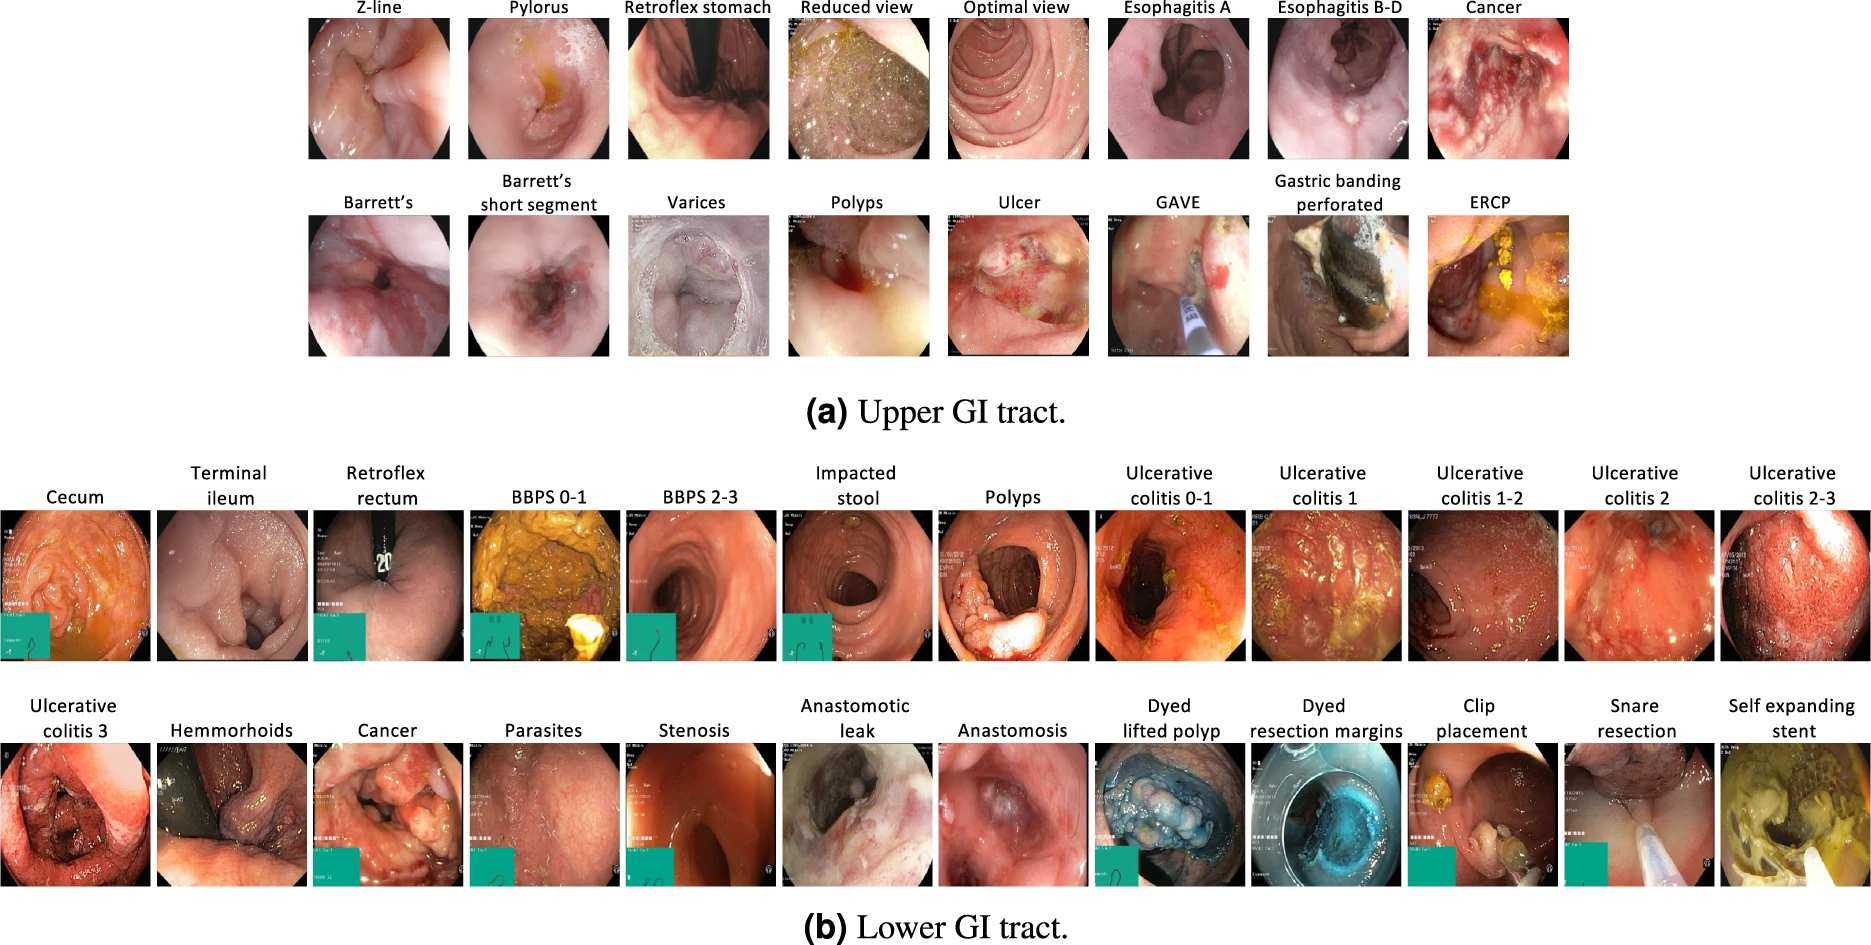

# Image Hiearchy

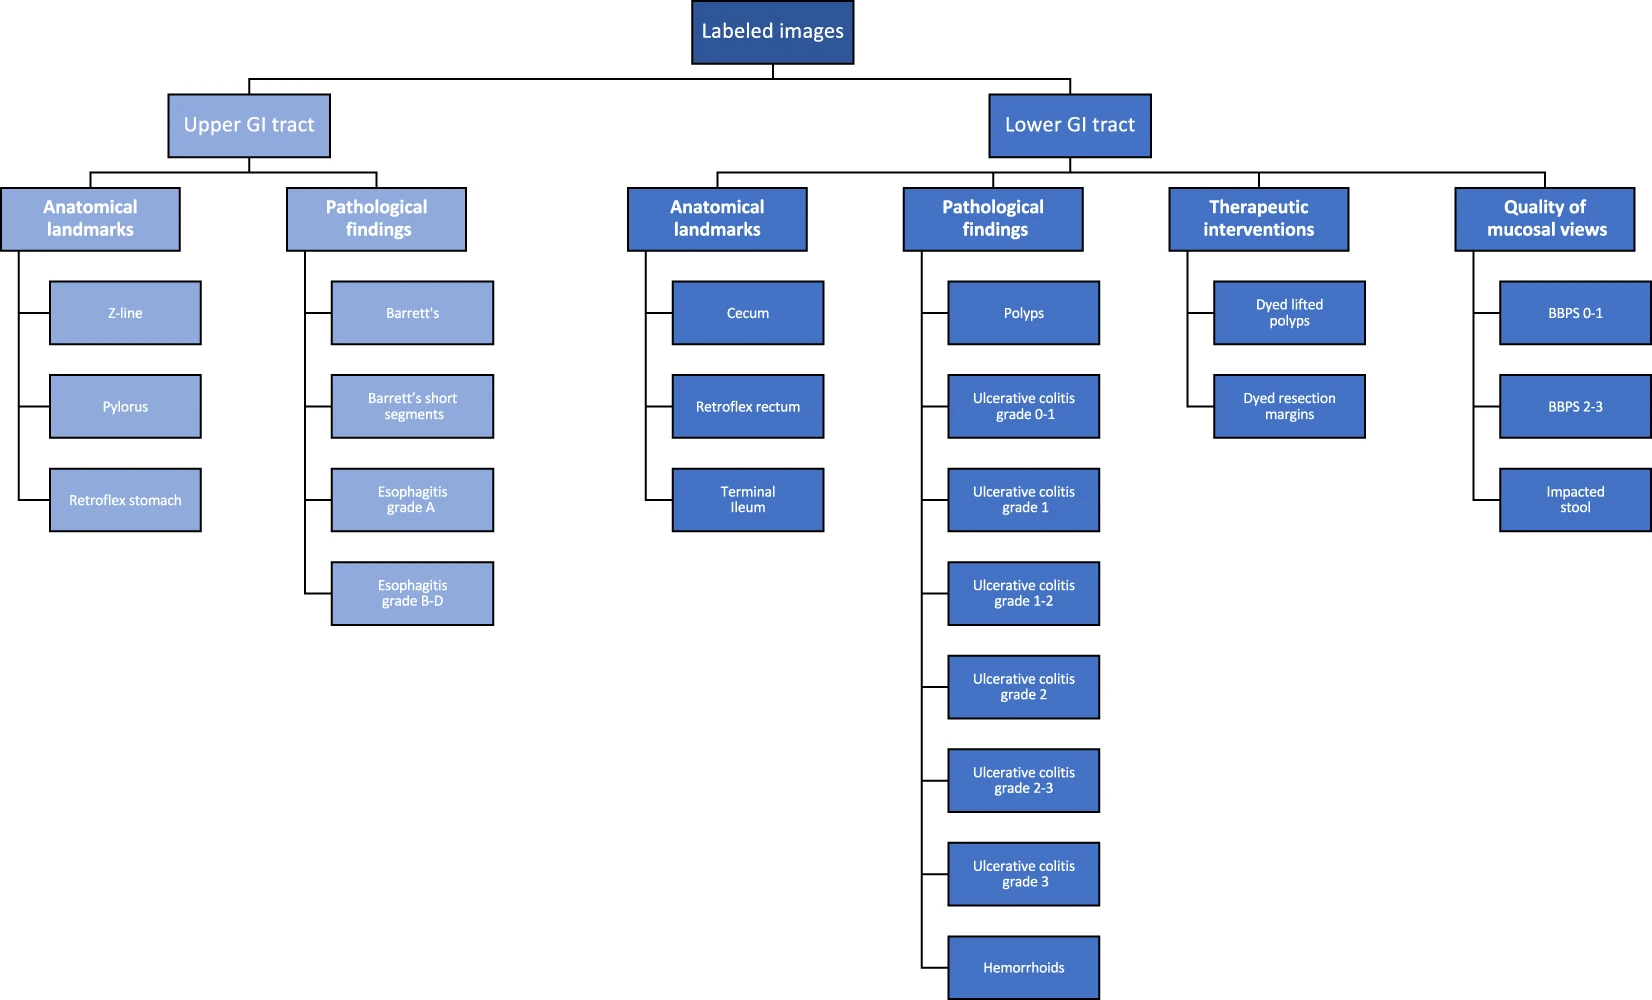

# Labelled Images Count

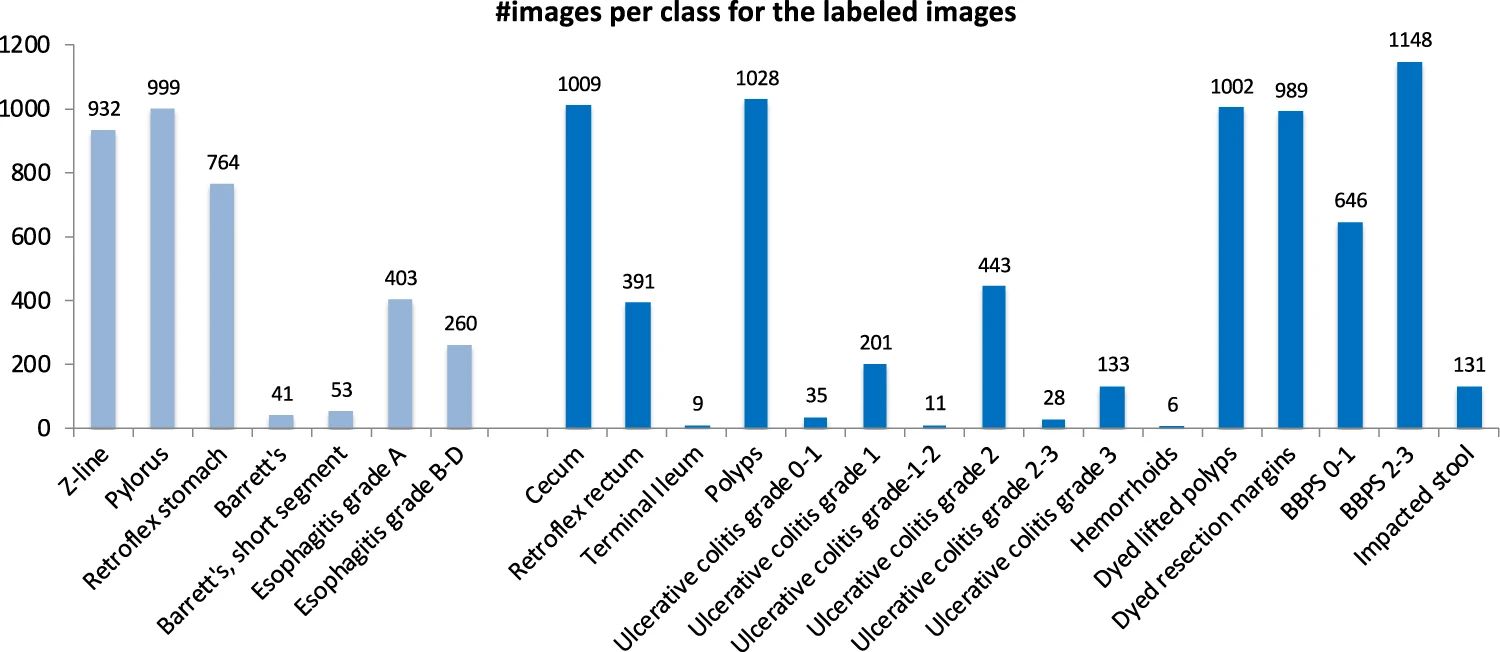

# Import Libraries

In [114]:
import cv2
import glob
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import skimage.io

In [2]:
# from pathlib import Path

# p = Path('hyper-kvasir-labeled-images/bbps-0-1')

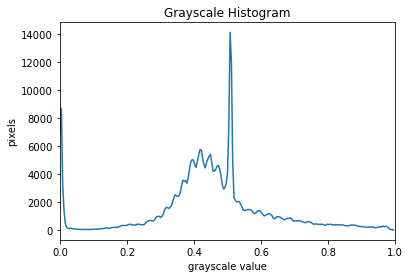

In [5]:
path = r'hyper-kvasir-labeled-images/ileum/4854b304-aa34-42e8-a254-bbd37b373be3.jpg'
image = skimage.io.imread(path)
gray_image = skimage.color.rgb2gray(image)


histogram, bin_edges = np.histogram(gray_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

# Text Removal from the Image

* OCR (Optical Character Recognition) to detect text inside images, and inpainting - the process where missing parts of a photo are filled in to produce a complete image - to remove the text we detected.

* Step 1 : Identify text in the image and obtain the bounding box coordinates of each text, using Keras-ocr.
* Step 2: For each bounding box, apply a mask to tell the algorithm which part of the image we should inpaint.
* Step 3: Finally, apply an inpainting algorithm to inpaint the masked areas of the image, resulting in a text-free image, using cv2.

In [6]:
image = cv2.imread(path)

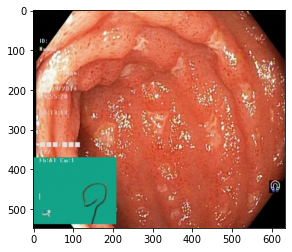

In [7]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [9]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

image = cv2.imread('hyper-kvasir-labeled-images/ileum/4854b304-aa34-42e8-a254-bbd37b373be3.jpg')

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
    # read image
    #org_img = keras_ocr.tools.read(image)
img = keras_ocr.tools.read(image)
        # generate (word, box) tuples 
prediction_groups = pipeline.recognize([img])
mask = np.zeros(img.shape[:2], dtype="uint8")
for box in prediction_groups[0]:
    x0, y0 = box[1][0]
    x1, y1 = box[1][1] 
    x2, y2 = box[1][2]
    x3, y3 = box[1][3] 

    x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
    x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

    thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
    
    cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
    masked = cv2.bitwise_and(img, img, mask=mask)
    img = cv2.inpaint(img, mask, 7 , cv2.INPAINT_NS)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


Looking for C:\Users\mathews\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\mathews\.keras-ocr\crnn_kurapan.h5


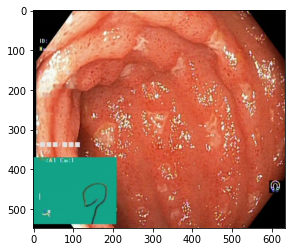

In [10]:
plt.imshow(rgb_img)

# Green Box Removal

True

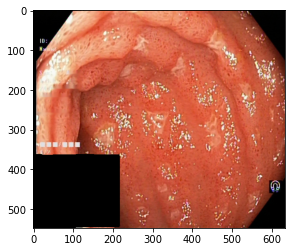

In [22]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower = np.array([78,43,46])
upper = np.array([110,255,255])
mask = cv2.inRange(hsv,lower, upper)
erode = cv2.erode(mask,None,iterations = 2)
dilate = cv2.dilate(erode,None, iterations = 10)
dilate = dilate-255
sub_img = cv2.bitwise_and(img, img, mask=dilate)
rgb_mask = cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_mask)
cv2.imwrite("text_removed_final.jpg",sub_img)

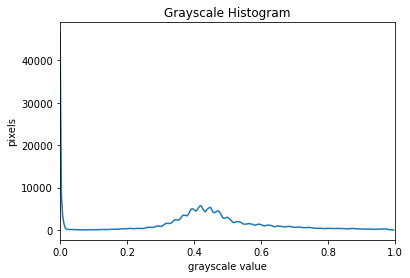

In [23]:
gray_image = skimage.color.rgb2gray(rgb_mask)
histogram, bin_edges = np.histogram(gray_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

# Image Enhancement

* Brightness, Contrast, Color, Sharpness of the images are changed.

Text(0.5, 1.0, 'Sharpness')

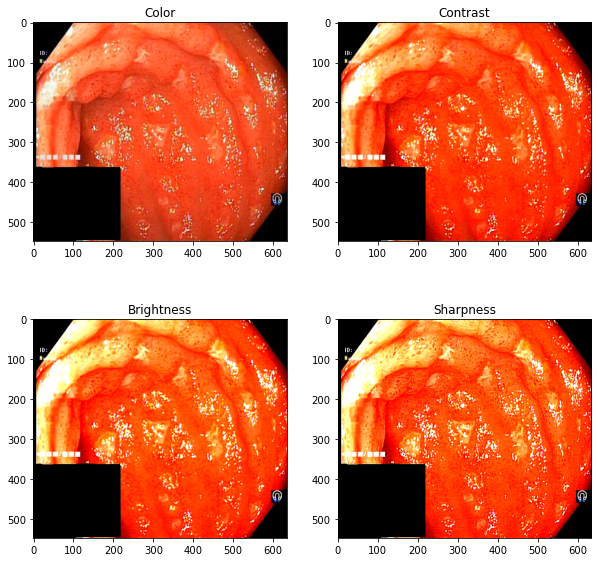

In [98]:

# This will import Image and ImageEnhance modules
from PIL import Image, ImageEnhance
plt.figure(figsize=(10,10))

# Opening Image
image = Image.open('text_removed_final.jpg')
image_color_enhan = image.copy()

image_1 = ImageEnhance.Color(image_color_enhan).enhance(1.5)
image_2 = ImageEnhance.Contrast(image_1).enhance(1.5)
image_3 = ImageEnhance.Brightness(image_2).enhance(1.3)
image_4 = ImageEnhance.Sharpness(image_3).enhance(4.0)

plt.subplot(2,2,1)
plt.imshow(image_1)
plt.title('Color')

plt.subplot(2,2,2)
plt.imshow(image_2)
plt.title('Contrast')

plt.subplot(2,2,3)
plt.imshow(image_3)
plt.title('Brightness')

plt.subplot(2,2,4)
plt.imshow(image_4)
plt.title('Sharpness')
  
# # Creating object of Brightness class
# im3 = ImageEnhance.Brightness(im)
  
# # showing resultant image
# im3.enhance(1.2).show()




# Image Augmentation

###### Flipping the images in different angles

* Horizontally
* vertically
* Rotate 180^
* Rotate 270^

###### Gamma Correction
* Gamma correction
* Gamma correction on channel value

Text(0.5, 1.0, 'Rotate 270')

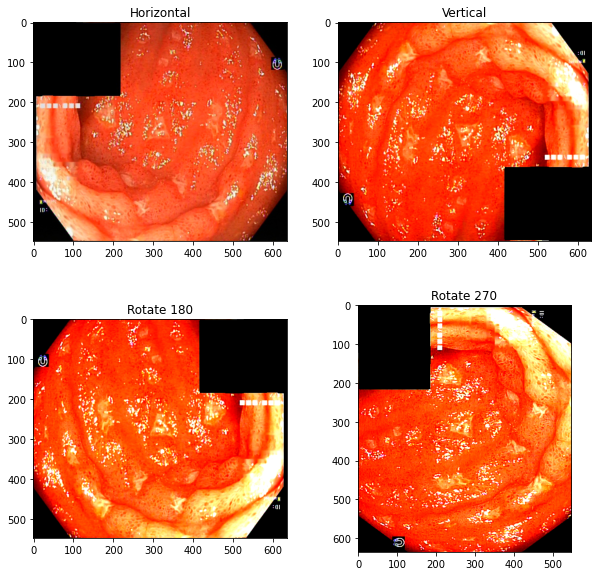

In [120]:
# This will import Image and ImageEnhance modules
from PIL import Image, ImageEnhance
plt.figure(figsize=(10,10))

# Opening Image
image = Image.open('text_removed_final.jpg')

image_5 = image_1.transpose(Image.FLIP_TOP_BOTTOM)
image_6 = image_2.transpose(Image.FLIP_LEFT_RIGHT)
image_7 = image_3.transpose(Image.ROTATE_180)
image_8 = image_4.transpose(Image.ROTATE_270)


plt.subplot(2,2,1)
plt.imshow(image_5)
plt.title('Horizontal')

plt.subplot(2,2,2)
plt.imshow(image_6)
plt.title('Vertical')

plt.subplot(2,2,3)
plt.imshow(image_7)
plt.title('Rotate 180')

plt.subplot(2,2,4)
plt.imshow(image_8)
plt.title('Rotate 270')


In [121]:
image_8.save('final_image.jpg')

# Gamma Correction 

In [131]:
# read image
img = cv2.imread('final_image.jpg')

# METHOD 1: RGB

# convert img to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute gamma = log(mid*255)/log(mean)
mid = 0.5
mean = np.mean(gray)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)

# do gamma correction
img_gamma1 = np.power(img, gamma).clip(0,255).astype(np.uint8)



# METHOD 2: HSV (or other color spaces)

# convert img to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, sat, val = cv2.split(hsv)

# compute gamma = log(mid*255)/log(mean)
mid = 0.5
mean = np.mean(val)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)

# do gamma correction on value channel
val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)

# combine new value channel with original hue and sat channels
hsv_gamma = cv2.merge([hue, sat, val_gamma])
img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2BGR)

# show results
cv2.imshow('input', img)
cv2.imshow('result1', img_gamma1)
cv2.imshow('result2', img_gamma2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save results
cv2.imwrite('gamma1.jpg', img_gamma1)
cv2.imwrite('gamma2.jpg', img_gamma2)



1.0270441435186481
0.9122787464119128


True

Text(0.5, 1.0, 'Gamma Correction on channel Value')

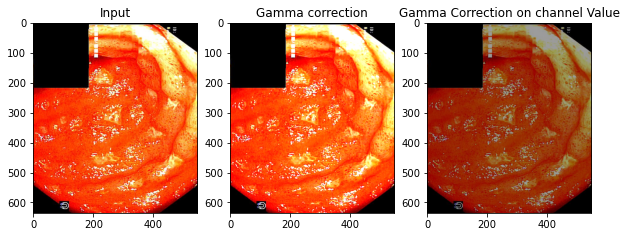

In [150]:
plt.figure(figsize=(10,10))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gamma1 = cv2.cvtColor(img_gamma1, cv2.COLOR_BGR2RGB)
img_gamma2 = cv2.cvtColor(img_gamma2, cv2.COLOR_BGR2RGB)

plt.subplot(2,3,1)
plt.imshow(img)
plt.title('Input')

plt.subplot(2,3,2)
plt.imshow(img_gamma1)
plt.title('Gamma correction')

plt.subplot(2,3,3)
plt.imshow(img_gamma2)
plt.title('Gamma Correction on channel Value')




# Challenges - (10-5-2022)

* I can't able to apply above finding in mutiple images using a for loop. While using for loop, it's not showing the result. It has to be fixed.

* SMOTE for imbalanced dataset

* Model Training and finding the accuracy of the model